In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import os

from sklearn.model_selection import train_test_split
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

Reading table with info about images. All images have number names, like 1234.png, 345.png. We need to get their styles from this table

In [3]:
paintings = pd.read_csv("train_info.csv")
paintings.head(15)

,filename,artist,title,style,genre,date
0,102257.jpg,5b39c876740bfc1cfaf544721c43cac3,Uriel,Color Field Painting,abstract,1955.0
1,75232.jpg,5b39c876740bfc1cfaf544721c43cac3,Vir Heroicus Sublimis,Color Field Painting,abstract,1950.0
2,29855.jpg,96e5bc98488ed589b9bf17ad9fd09371,Night March of a Hundred Demons (left half),Yamato-e,mythological painting,NaN
3,62252.jpg,5b39c876740bfc1cfaf544721c43cac3,"Who’s Afraid of Red, Yellow and Blue II",Color Field Painting,abstract,NaN
4,63861.jpg,5b39c876740bfc1cfaf544721c43cac3,Black Fire I,Color Field Painting,abstract,1963.0
5,53180.jpg,782192dc825c7c1149825adcb7caacbc,Camellia and Bush Warbler,Ukiyo-e,bird-and-flower painting,1844
6,70944.jpg,afdfc43410410892bc9d1c4d3c3d6220,Forbidden Land,Surrealism,landscape,1937.0
7,59792.jpg,9f0984ce62483f294fc666d74e0974f6,Descent from the cross,Northern Renaissance,religious painting,NaN
8,48138.jpg,3a40b18a78ceb822961393c50bdb522b,Snowy landscape with a woman brandishing a bro...,Ukiyo-e,landscape,NaN
9,99442.jpg,d09f796f2b0aa11dffc88badd9806119,Storm at sea,Romanticism,marina,1873


In [31]:
paintings = paintings[["filename", "style"]]
styles = {"Romanticism": 1, "Realism": 2, "Symbolism": 3, "Impressionism": 4, "Ukiyo-e": 5, "Cubism": 6}
paintings = paintings.loc[paintings['style'].isin(styles)]
print(paintings["style"].unique())
paintings.head(10)

['Ukiyo-e' 'Romanticism' 'Realism' 'Cubism' 'Symbolism' 'Impressionism']


,filename,style
5,53180.jpg,Ukiyo-e
8,48138.jpg,Ukiyo-e
9,99442.jpg,Romanticism
10,23508.jpg,Ukiyo-e
12,27254.jpg,Ukiyo-e
13,47145.jpg,Ukiyo-e
16,28908.jpg,Realism
18,7486.jpg,Romanticism
19,35766.jpg,Romanticism
21,71024.jpg,Ukiyo-e


In [32]:
def load_images(folder):
    images = []
    stl = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img, (128, 128))
        if img is not None and filename in paintings["filename"].unique():
            images.append(img)
            stl.append(styles[paintings.loc[paintings['filename'] == filename, 'style'].iloc[0]])
    return images, stl

img_list, im_styles =load_images("train_2")

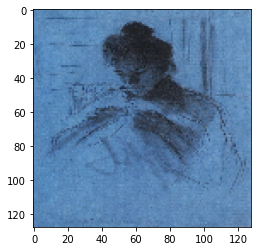

Realism


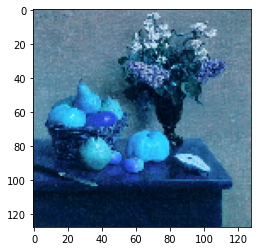

Realism


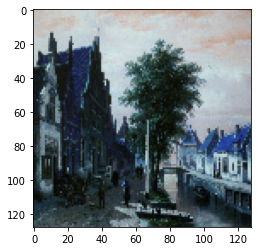

Romanticism


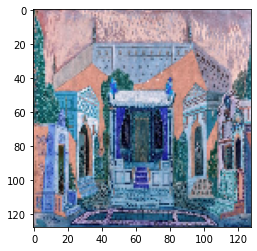

Cubism


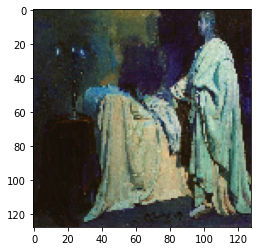

Realism


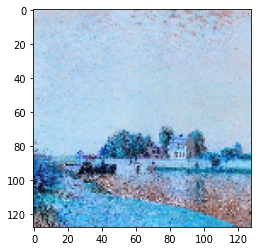

Impressionism


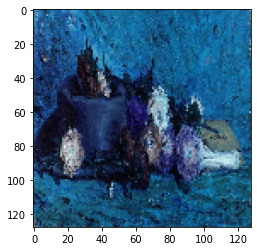

Impressionism


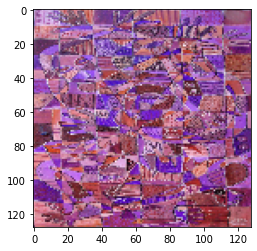

Cubism


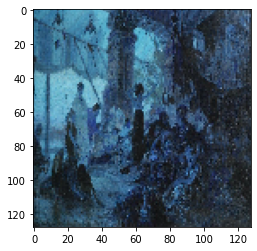

Romanticism


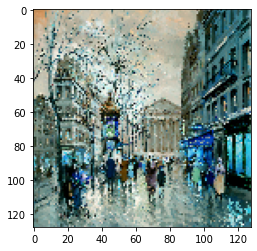

Impressionism


In [6]:
for image, num in zip(img_list[:10], im_styles[:10]):
    plt.imshow(image)
    plt.show()
    print(num)

In [58]:
def model_cnn(in_shape=(128, 128, 3), out_shape=10):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(out_shape, activation='sigmoid'))
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[fbeta])
    return model

In [34]:
# def train(model, train_loader, optimizer):
#     model.train()
#     for batch_idx, (data, target) in enumerate(train_loader):
#         optimizer.zero_grad()
#         output = model(data)
#         loss = F.cross_entropy(output, target)
#         loss.backward()
#         optimizer.step()
         
        
# def test(model, val_loader):
#     model.eval()
#     valid_loss = 0.0
#     criterion = nn.CrossEntropyLoss()
#     correct = 0
#     total = 0

#     for data, labels in val_loader:
#         target = model(data)
#         loss = criterion(target, labels)
#         valid_loss = loss.item() * data.size(0)
#         correct += torch.sum(target.argmax(-1) == labels).item()
#         total += labels.size(0)

In [35]:
# calculate fbeta score for multi-class/label classification
def fbeta(y_true, y_pred, beta=2):
    y_pred = backend.clip(y_pred, 0, 1)
    tp = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)), axis=1)
    fp = backend.sum(backend.round(backend.clip(y_pred - y_true, 0, 1)), axis=1)
    fn = backend.sum(backend.round(backend.clip(y_true - y_pred, 0, 1)), axis=1)
    p = tp / (tp + fp + backend.epsilon())
    r = tp / (tp + fn + backend.epsilon())
    bb = beta ** 2
    fbeta_score = backend.mean((1 + bb) * (p * r) / (bb * p + r + backend.epsilon()))
    return fbeta_score

In [57]:
import torch.optim as optim
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
INIT_lr = 0.0001
import tensorflow as tf


model = model_cnn()
trainX, testX, trainY, testY = train_test_split(img_list[300:], im_styles[300:], test_size=0.2, random_state=1)
trainX = np.array(trainX)
testX = np.array(testX)
trainY = np.asarray(trainY).astype('float32').reshape((-1,1))
testY = np.asarray(testY).astype('float32').reshape((-1,1))


datagen = ImageDataGenerator(rescale=1./255)
train_it = datagen.flow(trainX, trainY, batch_size=128)
test_it = datagen.flow(testX, testY, batch_size=128)

convolutional_model = model.fit(trainX, trainY, epochs=5,batch_size=32,verbose=1, validation_data=(testX, testY))
# print(convolutional_model.evaluate(trainX, trainY))

# history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=5, verbose=0)
# loss, fbeta = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
# print(loss, fbeta)

Epoch 1/5


ValueError: in user code:

    File "/home/skynet/.local/lib/python3.8/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/home/skynet/.local/lib/python3.8/site-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/skynet/.local/lib/python3.8/site-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/home/skynet/.local/lib/python3.8/site-packages/keras/engine/training.py", line 817, in train_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/home/skynet/.local/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 439, in update_state
        self.build(y_pred, y_true)
    File "/home/skynet/.local/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 359, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(y_pred, self._get_metric_objects,
    File "/home/skynet/.local/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 485, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "/home/skynet/.local/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 485, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "/home/skynet/.local/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 504, in _get_metric_object
        metric_obj = metrics_mod.get(metric)
    File "/home/skynet/.local/lib/python3.8/site-packages/keras/metrics.py", line 3789, in get
        raise ValueError(

    ValueError: Could not interpret metric identifier: nan
